<a href="https://colab.research.google.com/github/ricardodhuelsmann/python_bibliotecas/blob/main/Seaborn/2_Gr%C3%A1ficos_relacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


#seaborn.***relplot***
###Essa função fornece acesso a várias funções de nível de eixo diferentes que mostram o relacionamento entre duas variáveis com mapeamentos semânticos de subconjuntos. O parâmetro kind seleciona a função de nível de eixo subjacente a ser usada:
A dispersão é o padrão do 'relplot'. Para fazer gráficos de linha, deve ser adicionado 'kind = "line"'

In [2]:
#Para ilustrar gráficos de disersão, faz-se uma importação de uma série de dados do próprio seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


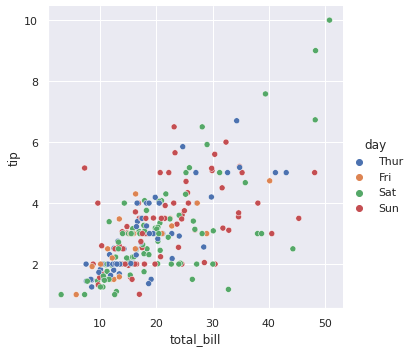

In [3]:
#Informando a origem dos dados, os valores de X e de Y, assim como variáveis semânticas geram um gráfico
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

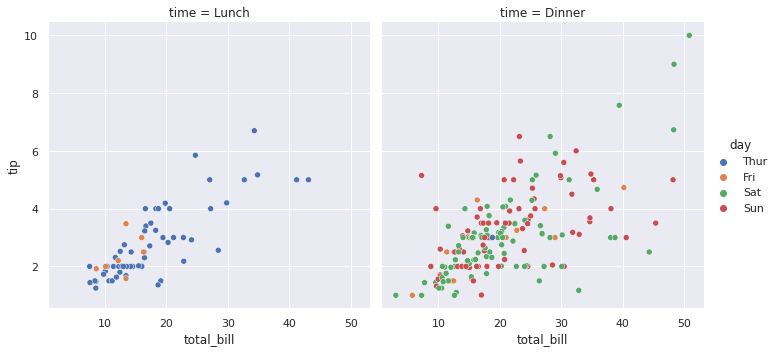

In [4]:
#Atribuir uma variável 'col' cria uma figura dividida com vários 'subplots' organizados nas colunas da grade
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

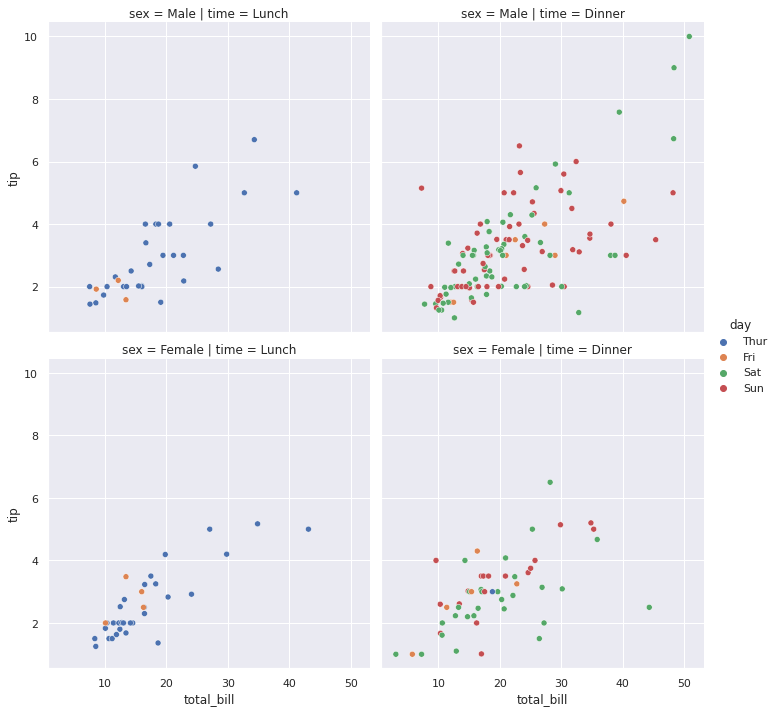

In [5]:
#Pode-se também dividir linhas além das colunas
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

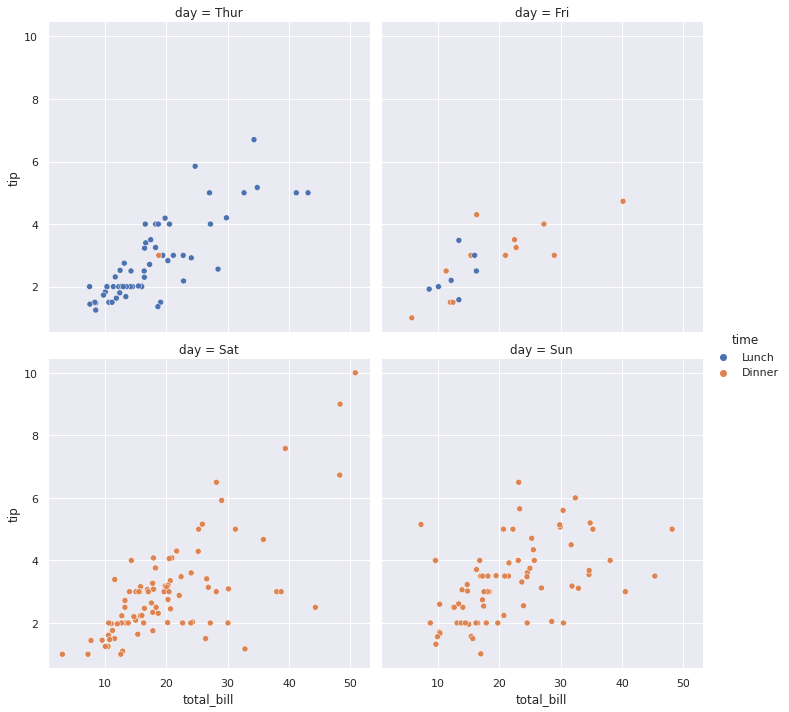

In [6]:
#Quando a variável tem muitos níveis, pode dividir entre colunas e linhas. Usa-se 'col_wrap'
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)

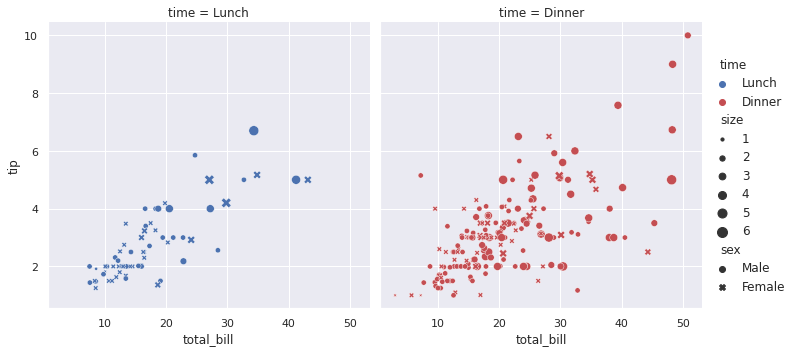

In [7]:
#A atribuição de várias variáveis semânticas pode mostrar relacionamentos multidimensionais
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

##Novo dataset para gráficos em linha

In [8]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


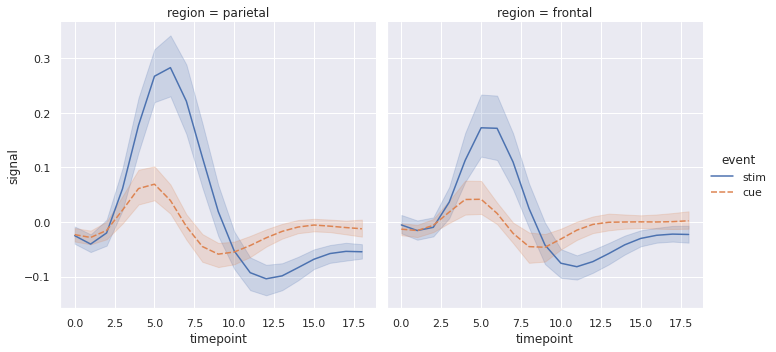

In [9]:
#Para fazer gráfico de linha, usa-se kind="line". Usando relplot há mais liberdade que lineplot(). 
sns.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line",
)

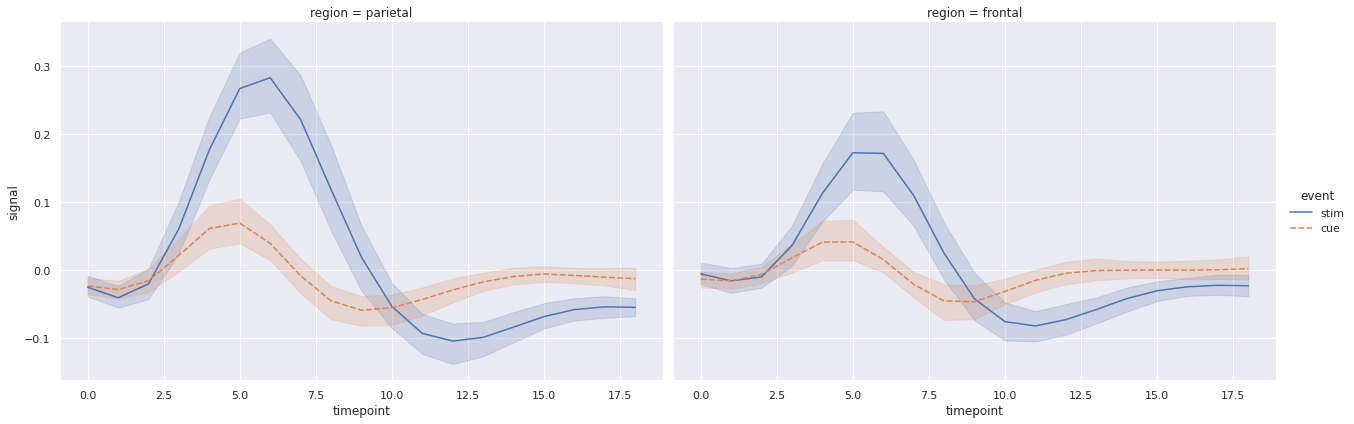

In [10]:
#O tamanho e forma da figura são parametrizados pela altura e proporção de cada faceta
sns.relplot(
    data=fmri, x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=6, aspect=1.5, kind="line"
)

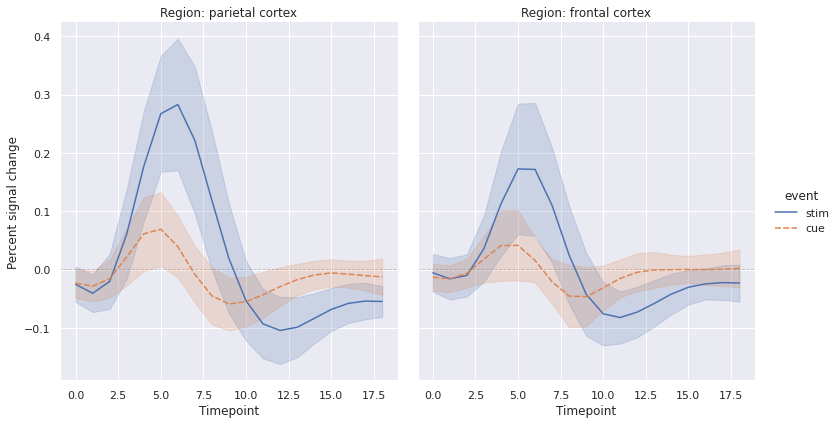

In [11]:
#O objeto de retorno do 'relplot()' é sempre um "FacetGrid", que tem métodos que permitem edição de vários aspectos
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=6, aspect=.9, kind="line", ci='sd'
)
(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=2))

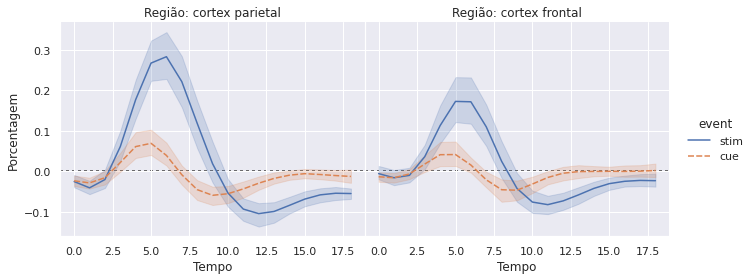

In [12]:
#Alterando algumas configurações anteriores
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=1.2, kind="line", 
)
(g.map(plt.axhline, y=0, color=".25", dashes=(2, 2), zorder=0)
  .set_axis_labels("Tempo", "Porcentagem")
  .set_titles("Região: cortex {col_name}")
  .tight_layout(w_pad=0))

##Novos dados

In [13]:
#Usando o relplot() também é possível visualizar dados amplos

flights_wide = sns.load_dataset("flights").pivot("year", "month", "passengers") #Os dados foram pivotados em formato mais inteligente
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


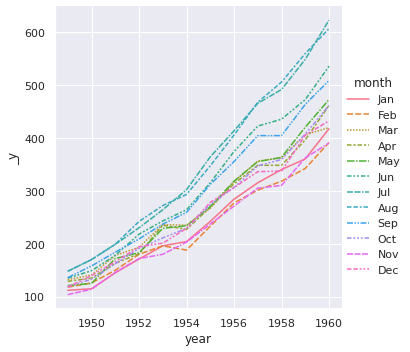

In [14]:
#Facetar não é uma opção neste caso, mas o gráfico ainda aproveitará a legenda externa oferecida pelo FacetGrid:

sns.relplot(data=flights_wide, kind="line")

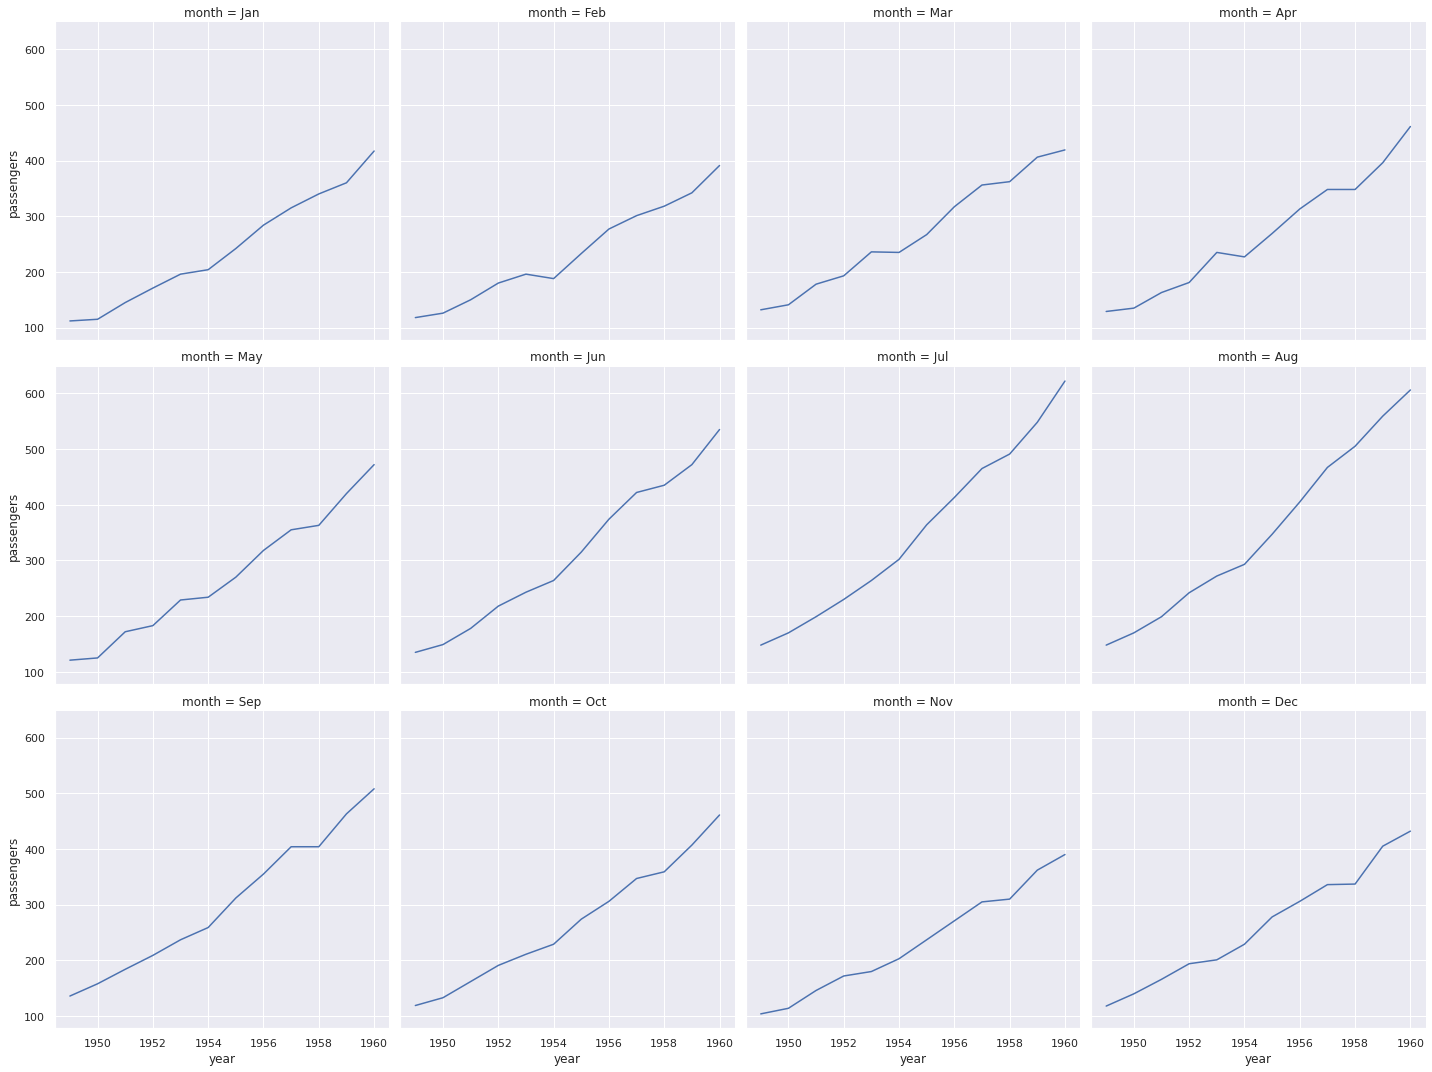

In [15]:
#Uma outra forma de visualizar os mesmos dados, só que sem pivotar a tabela original
dados_voo = sns.load_dataset("flights")
sns.relplot(data=dados_voo, x='year', y='passengers', col='month', col_wrap=4, kind="line")

#seaborn.***scatterplot***
###Desenhe um gráfico de dispersão com possibilidade de vários agrupamentos semânticos.

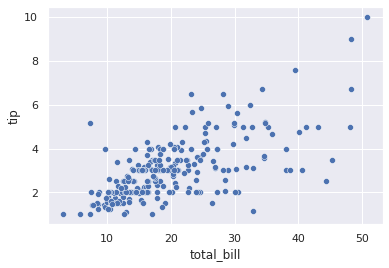

In [16]:
#De forma muito similar ao 'relplot', é possível gerar gráficos com o 'scatterplot'
sns.scatterplot(data=tips, x="total_bill", y="tip")

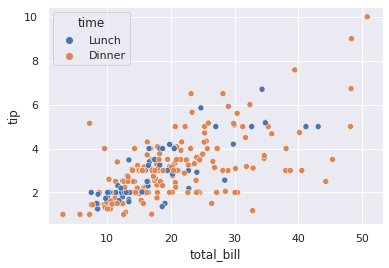

In [17]:
#Alterar as matizes baseadas em uma variável
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

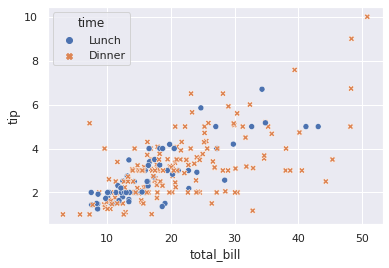

In [18]:
#Definir também forma de estilo diferente baseado na mesma variável
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")

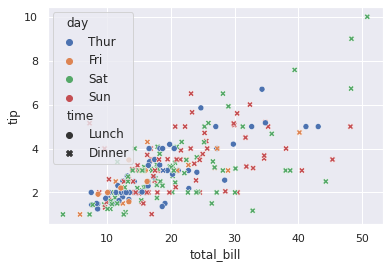

In [19]:
#Definir matiz e estilo para outras variáveis vai alterar automaticamente as cores e tipos de forma
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

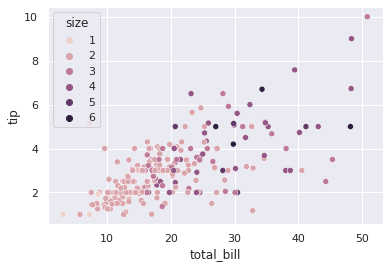

In [20]:
#Se a variável definida para matiz for numérica, será adotada uma escala de cores
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size")

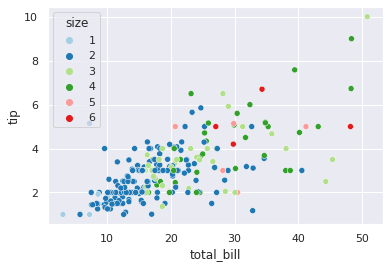

In [44]:
#É possível definir o nome da paleta de cores
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="Paired")

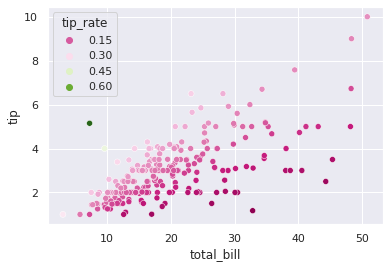

In [33]:
#Se houver um número muito grande de valores numéricos únicos, a legenda vai fazer um espaçamento representativo
tip_rate = tips.eval("tip / total_bill").rename("tip_rate")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate, palette="PiYG")

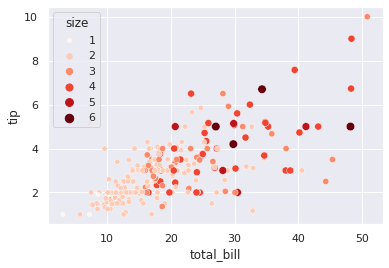

In [40]:
#Uma variável numérica pode ser atribuída ao 'size' para aplicar tamanho diferente nos pontos dos dados
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="size", palette='Reds')

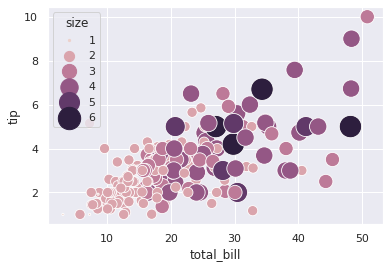

In [50]:
#É possível controlar os tamanhos mínimo e máximo dos pontos
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(5, 500), legend="full"
)

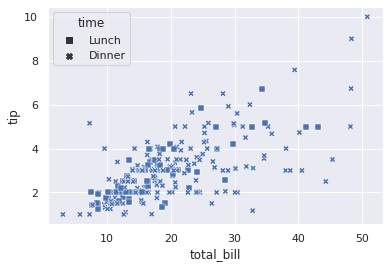

In [51]:
#Para controlar marcadores de forma específica, passa-se uma lista ou dicionário dos marcadores
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)

#Importante 
Usar 'relplot()' é necessário para combinar 'scatterplot()' e 'FacetGrid'. Isso permite o agrupamento em variáveis categóricas adicionais e plotá-los em vários subplots.

Usar 'relplot()' é mais seguro do que usar 'FacetGrid diretamente', pois garante a sincronização dos mapeamentos semânticos entre as facetas.

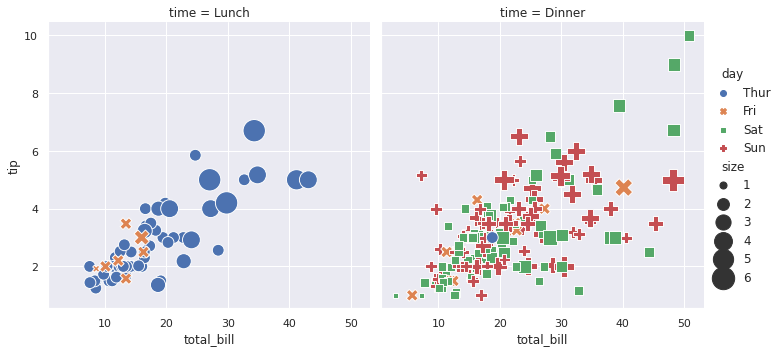

In [57]:
sns.relplot(
    data=tips, x="total_bill", y="tip", size='size',
    col="time", hue="day", style="day", sizes=(50, 500),
    kind="scatter"
)

#seaborn.***lineplot***
###Desenhe um gráfico de linha com possibilidade de vários agrupamentos semânticos.

In [59]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


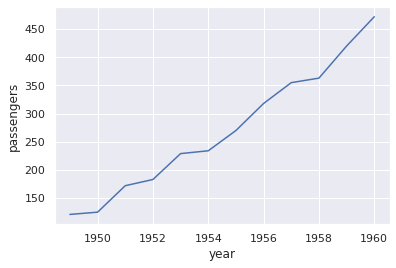

In [60]:
#Para desenhar uma gráfico em linha, passa-se as variáveis x e y
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [61]:
#Dinamize o dataframe para uma representação de formato amplo:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


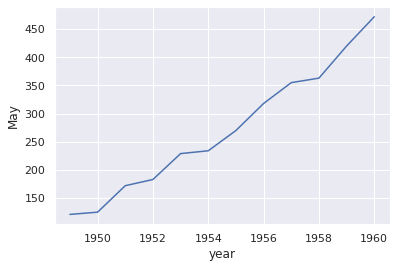

In [62]:
#Se quiser visualizar uma única variável, passar como parâmetros
sns.lineplot(data=flights_wide["May"])

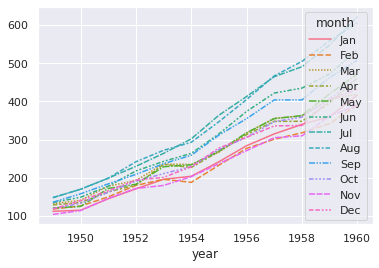

In [64]:
#Se passar todo o 'dataset' cada coluna será plotada individualmente
sns.lineplot(data=flights_wide)

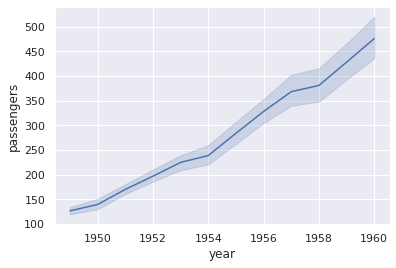

In [65]:
#Se passar todos os dados de uma vez como uma única variável, os valores serão agregados e apresentado com intervalo de confiança de 95%
sns.lineplot(data=flights, x="year", y="passengers")

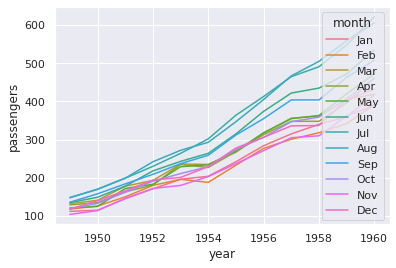

In [66]:
#Atribuindo agrupamentos semânticos (matiz, tamanho ou estilo) proporciona visualização de linhas separadas
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

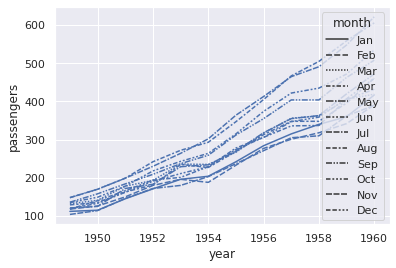

In [67]:
sns.lineplot(data=flights, x="year", y="passengers", style="month")

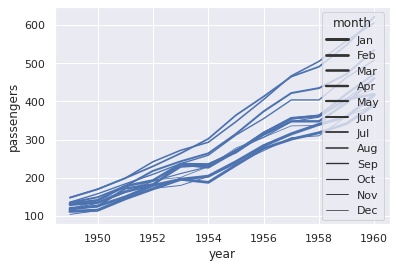

In [68]:
sns.lineplot(data=flights, x="year", y="passengers", size="month")

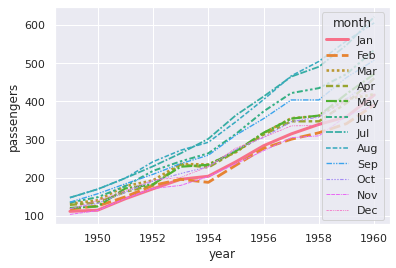

In [69]:
#A mesma variável pode ser atribuída para diferenciar matiz, tamanho e estilo
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month", size='month')

In [70]:
#Cada variável semântica pode ser representada por uma coluna. Para explicar isso, chama-se um novo 'dataset'
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


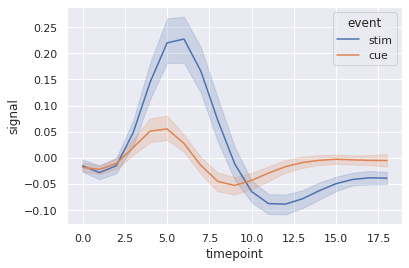

In [71]:
#As observações repetidas são agregadas mesmo quando o agrupamento semântico é usado:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

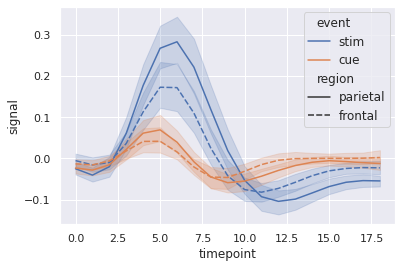

In [75]:
#Atribua matiz e estilo para representar duas variáveis de agrupamento diferentes:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", style="region")

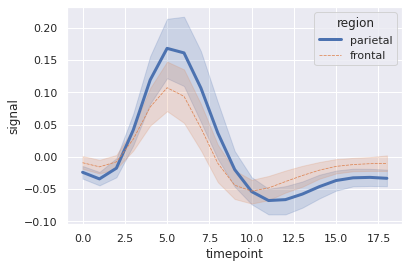

In [81]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue='region', style='region', size='region')

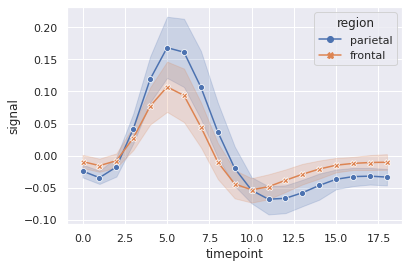

In [83]:
#Quando atribui-se estilo a uma variável, marcadores diferentes pode ser usados para distinguir os grupos
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="region", style="region",
    markers=True, dashes=False
)

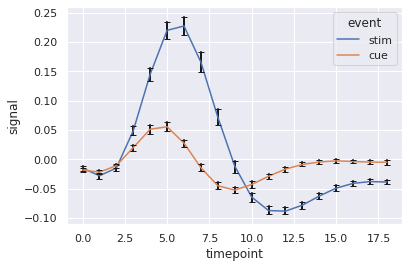

In [99]:
#Ao invés de mostrar intervalo de confiança de 95%, pode ser aplicado outro intervalo desejado (neste caso, 50% na forma de barra de erros)
sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", 
    err_kws={'elinewidth':2, 'capsize':3, 'ecolor':'k'}, ci=50
)

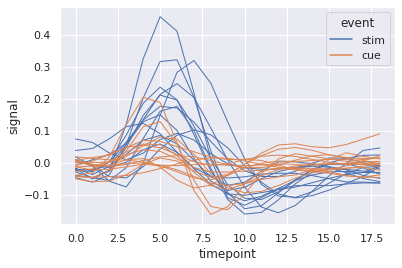

In [100]:
#Atribuir a variável de unidades representará várias linhas sem aplicar um mapeamento semântico:
sns.lineplot(
    data=fmri.query("region == 'frontal'"),
    x="timepoint", y="signal", hue="event", units="subject",
    estimator=None, lw=1,
)

In [101]:
#Carregando outro dataset
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


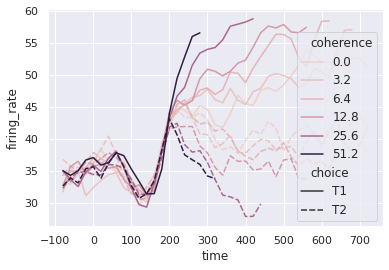

In [102]:
#Atribuindo variáveis numéricas a matiz mapeia-o de maneira diferente, usando uma paleta padrão diferente e um mapeamento de cores quantitativo: 
sns.lineplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice",
)

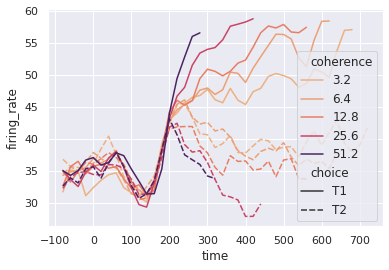

In [104]:
#Controla-se a cor pela escolha da paleta
sns.lineplot(
    data=dots.query("coherence > 0"),
    x="time", y="firing_rate", hue="coherence", style="choice",
     palette="flare",
)

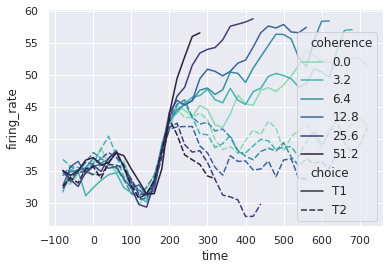

In [105]:
#Ou então passa-se uma paleta previamente definida
palette = sns.color_palette("mako_r", 6)
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    hue="coherence", style="choice",
    palette=palette
)

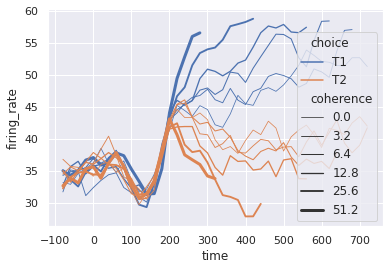

In [106]:
#De mesma forma que altera-se a cor, pode ser alterado o tamanho das linhas
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    legend="full"
)

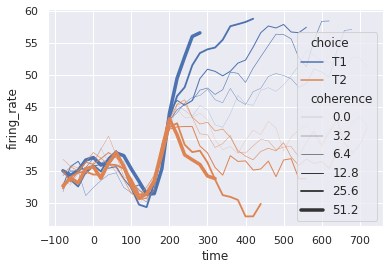

In [107]:
#Passe uma tupla, tamanhos = (menor, maior), para controlar o intervalo de larguras de linha usadas para mapear a semântica de tamanho:

sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    sizes=(.15, 3.5)
)

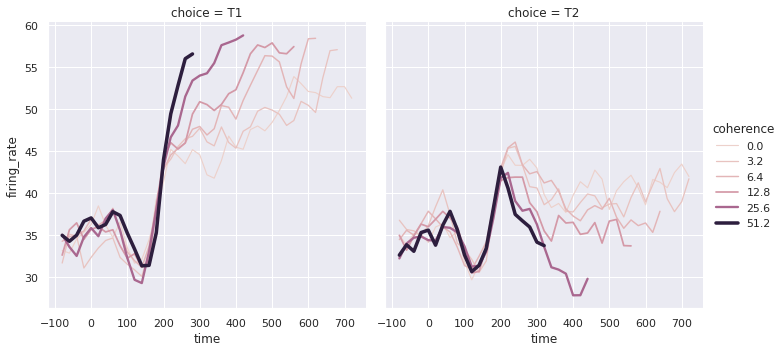

In [112]:
#Com funcionamento igual ao 'scatterplot', para plotar o agrupamento em variáveis categóricas adicionais
sns.relplot(
    data=dots, x="time", y="firing_rate",
    col="choice", hue="coherence", size="coherence", sizes=(1.15, 3.5),
    kind="line"
)